In [1]:
#!pip install sklearn-pandas

In [2]:
import pandas as pd  
import numpy as np  
import seaborn as sns
import matplotlib.pyplot as plt  
%matplotlib inline

In [3]:
from sklearn_pandas import DataFrameMapper
from sklearn import metrics, datasets, linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error, r2_score

## Step 1: Choosing the Data Set

The dataset that we will use to build the linear regression model is the Breast Cancer Wisconsin (Prognostic) Data Set from the UC Irvine Machine Learning Repository. The dataset contains 34 attributes whose description can be found along with the dataset. Our aim is to build a model which utilizes the attributes in the dataset to predict the time (in months) to recurrence of the Cancer disease. Thus, for the model we are trying to build, the elements that we mentioned in the Linear regression explanation are:

#### Linear Regression Model Elements
1. Predictors or Independent Variables or Inputs – The attributes present in the dataset apart from (ID, Time, Outcome) like Radius Mean, Area Mean, Perimeter Mean etc.
2. Response or Dependent Variable or Output – The time (in months) after which the disease recurred.
3. Residual – The difference in the time after which the disease actually recurred (real value) and the time predicted by the model after which the disease will recur (predicted value of the dependent variable).
4. Weights or Coefficients – These are calculated to determine the line that best “fits” the data. The coefficients will be computed by minimizing the MSE.
5. Intercept or Bias – It helps offset the effects of missing relevant predictors for the response and helps make the mean of the residuals 0. The intercept or bias acts as the default value for the function i.e. when all independent values are zero. In this context, the intercept will ensure that the mean of the residuals will be zero and it accounts for missing relevant attributes for predicting time to recurrence of cancer.

In [4]:
column_names = ['ID','Outcome','Time', 'Radius Mean', 'Texture Mean', 'Perimeter Mean',
       'Area Mean', 'Smoothness Mean', 'Compactness Mean', 'Concavity Mean',
       'Concave Points Mean', 'Symmetry Mean', 'Fractal Dimension Mean',
       'Radius SE', 'Texture SE', 'Perimeter SE', 'Area SE', 'Smoothness SE',
       'Compactness SE', 'Concavity SE', 'Concave Points SE', 'Symmetry SE',
       'Fractal Dimension SE', 'Radius Worst', 'Texture Worst',
       'Perimeter Worst', 'Area Worst', 'Smoothness Worst',
       'Compactness Worst', 'Concavity Worst', 'Concave Points Worst',
       'Symmetry Worst', 'Fractal Dimension Worst', 'Tumor Size', 'Lymph Node Status']

In [7]:
dataset_path = "C:/Work/PlayGround/Machine Learning/Breast_Cancer_Recurrence_Time/data/wpbc.data"

In [9]:
raw_dataset = pd.read_csv(dataset_path, names=column_names,
                      na_values = "?", sep=",")

In [10]:
dataset = raw_dataset.copy()

In [11]:
dataset.shape

(198, 35)

In [12]:
dataset.isnull().sum()

ID                         0
Outcome                    0
Time                       0
Radius Mean                0
Texture Mean               0
Perimeter Mean             0
Area Mean                  0
Smoothness Mean            0
Compactness Mean           0
Concavity Mean             0
Concave Points Mean        0
Symmetry Mean              0
Fractal Dimension Mean     0
Radius SE                  0
Texture SE                 0
Perimeter SE               0
Area SE                    0
Smoothness SE              0
Compactness SE             0
Concavity SE               0
Concave Points SE          0
Symmetry SE                0
Fractal Dimension SE       0
Radius Worst               0
Texture Worst              0
Perimeter Worst            0
Area Worst                 0
Smoothness Worst           0
Compactness Worst          0
Concavity Worst            0
Concave Points Worst       0
Symmetry Worst             0
Fractal Dimension Worst    0
Tumor Size                 0
Lymph Node Sta

## Step 2: Cleaning the Data
Next, we drop rows with NA values using dataset.dropna() and the rows where the disease has not recurred, in this case, dropping each one using dataset.drop(‘var name’, 1).

In [13]:
dataset = dataset.dropna()

In [14]:
dataset = dataset[dataset['Outcome'] != 'N']

We have 46 rows where the disease has recurred.

In [15]:
dataset.shape

(46, 35)

In [16]:
#Dropping the columns ID and Outcome as they do not add any value to the model
dataset = dataset.drop('Outcome', 1)
dataset = dataset.drop('ID', 1)

In [17]:
# Viewing statistics related to the data attributes
dataset.describe()

,Time,Radius Mean,Texture Mean,Perimeter Mean,Area Mean,Smoothness Mean,Compactness Mean,Concavity Mean,Concave Points Mean,Symmetry Mean,...,Perimeter Worst,Area Worst,Smoothness Worst,Compactness Worst,Concavity Worst,Concave Points Worst,Symmetry Worst,Fractal Dimension Worst,Tumor Size,Lymph Node Status
count,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,...,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000
mean,25.565217,18.330870,21.758913,121.095217,1081.980435,0.103063,0.141606,0.161542,0.093113,0.187848,...,151.332609,1635.767391,0.145341,0.357509,0.440004,0.183985,0.314017,0.088717,3.471739,4.869565
std,22.727030,3.365566,3.695717,22.910195,397.264721,0.010302,0.040692,0.062138,0.034361,0.021085,...,32.417293,703.147215,0.019605,0.130614,0.147636,0.037977,0.061458,0.016784,2.029851,6.017045
min,1.000000,12.340000,14.340000,81.150000,477.400000,0.082170,0.067220,0.052530,0.033340,0.142400,...,101.700000,733.200000,0.102100,0.120200,0.224900,0.118500,0.229300,0.060910,0.400000,0.000000
25%,9.000000,15.657500,19.067500,103.900000,799.875000,0.094077,0.113375,0.111025,0.067740,0.172175,...,128.300000,1144.250000,0.129775,0.261950,0.323700,0.152850,0.269150,0.076930,2.350000,0.250000
50%,16.500000,18.825000,21.365000,123.550000,1090.000000,0.103350,0.133350,0.164700,0.088235,0.185750,...,145.700000,1481.000000,0.146800,0.352650,0.404900,0.183400,0.304950,0.086945,3.000000,2.000000
75%,36.750000,20.262500,24.162500,133.425000,1278.500000,0.111875,0.166000,0.207525,0.108375,0.198900,...,170.850000,1905.500000,0.160725,0.409550,0.533200,0.208500,0.340700,0.100197,4.000000,7.000000
max,78.000000,27.220000,30.990000,182.100000,2250.000000,0.121500,0.236300,0.336800,0.191300,0.235600,...,232.200000,3903.000000,0.185100,0.744400,0.734500,0.275600,0.488200,0.134100,10.000000,27.000000


Before we use the attributes to build the model, let’s do some feature engineering!

## Step 3: Feature Engineering
Every time we talk about Feature Engineering we are referring to the process of preparing the input data for the model (the predictors or in this case
the Radius Mean, Area Mean, Perimeter Mean), to be compatible with the conditions for our models. There are different techniques to optimize this process (we will see it in another post in detail), but in our example here, we will just apply scaling to our data.

To start, let’s do an overview about the correlation among attributes. Correlation indicates the strength of the relationship between two features. If the correlation is close to 1 or -1 there is a strong association among variables, and if is closer to 0 the relationship is weak.

### We will be building three models in this tutorial

#### Model 1: A baseline model.
#### Model 2: A model with a single attribute as the predictor.
#### Model 3: A model with basic feature engineering involved.

In [18]:
baseline_dataset = dataset
baseline_dataset = baseline_dataset.drop('Time', axis = 1)

For building Model 2 and Model 3 let's do some analysis first.

We begin by building a correlation heatmap amongst the attributes to check which attributes have a strong relationship with our response variable Time.

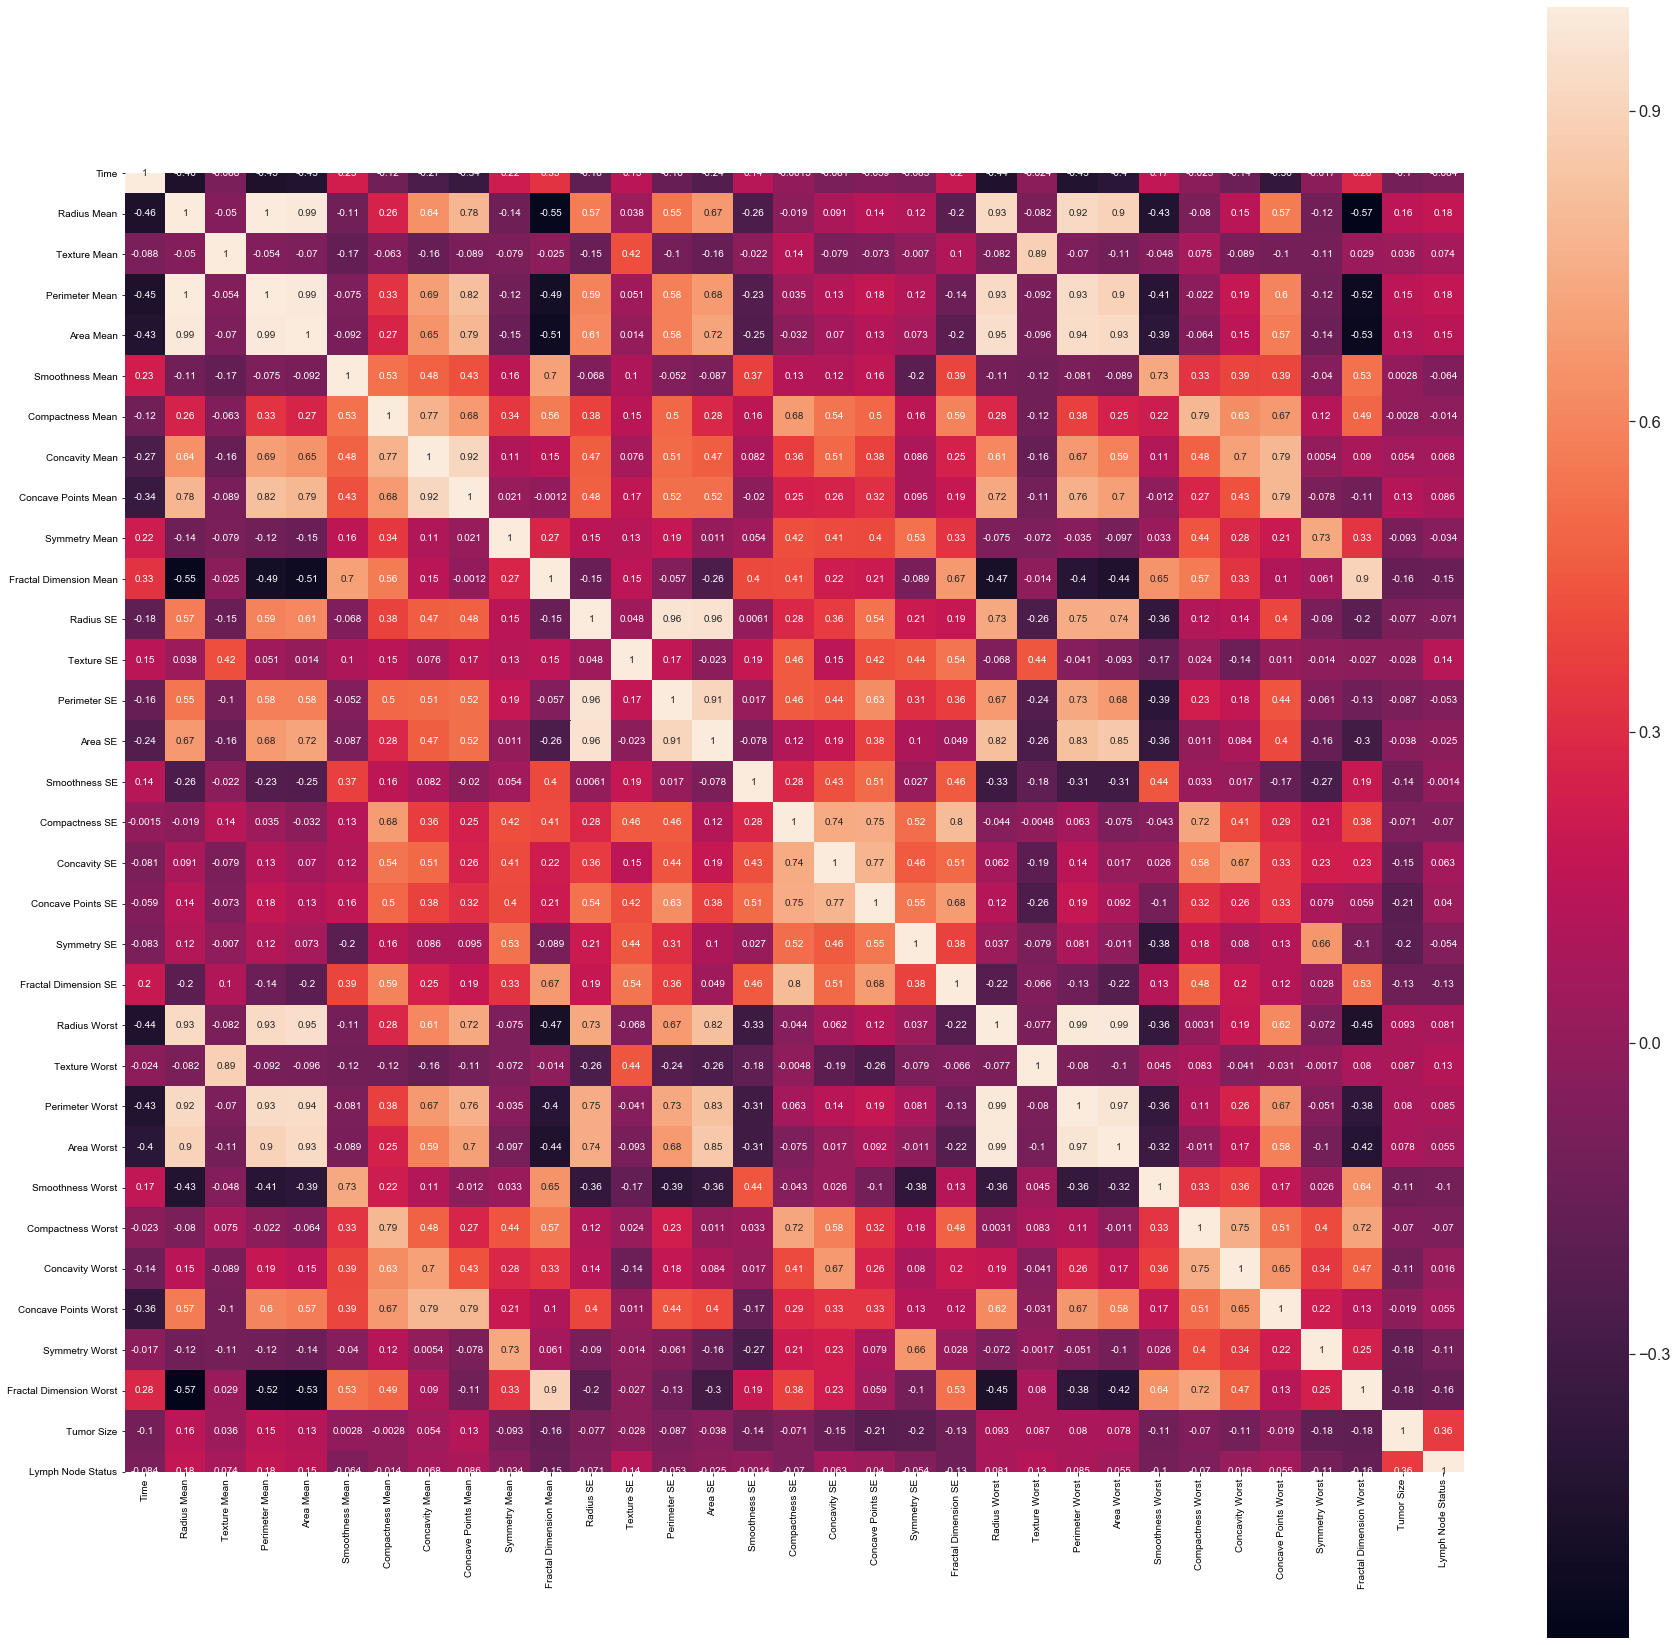

In [19]:
fig = plt.subplots(figsize = (30, 30))
sns.set(font_scale=1.5)
sns.heatmap(dataset.corr(),square = True,cbar=True,annot=True,annot_kws={'size': 10})
#plt.savefig("Correlation_All_Attributes.png")

### Evaluating Correlations
The positive values for correlations mean that the relationship is direct, so if one variable increases the other also has the same behavior, and vice versa. But if the correlation is negative, the relationship is inverse, that means, if one variable increases the other one decreases, and if the first one decreases the second one increases.

Now, to find the correlations among all the pairs of variables, we are using a popular Python visualization library called seaborn to generate a heatmap based on the correlation (i.e. how the attributes associate with each other) between the columns in the dataframe dataset.

<b>The lightest colors, show the strongest correlation (positive or negative)</b>, while the darker colors show a weak correlation. On inspecting the correlation visualization we see that there are various attributes that are strongly correlated to each other. Take for example the Radius Mean and the Area Mean, that have 0.99 correlation (almost 1). That makes sense, because the area is directly related to the radius, so if the radius increases, then so does the area.

In [20]:
# For the single attribute, we choose Radius Mean as it is highly correlated(negative correlation) attribute with Time.
single_attribute_dataset = dataset[['Radius Mean']]

''' Next, for the feature engineered model we drop the predictors that are highly correlated with other 
predictors to avoid the problems associated with multicollinearity.'''


### Fixing Multicollinearity
What do we do with these highly correlated variables? If we have strongly correlated predictors in our model, it could introduce a problem of multicollinearity which further has a negative impact on the accuracy of the model.

Multicollinearity makes reference to the strong correlation among different attributes or inputs in a model. This will have a negative impact on the model’s accuracy and it’s important to solve the multicollinearity problem before we adjust the model. Therefore, we select one attribute at random among the strongly correlated pairs and drop the rest of the attributes. It’s always good to check if the logic of the high correlation between the variables makes sense, i.e. the Radius and Area Mean in our case.

In [22]:
drop_list = ['Texture Mean', 'Perimeter Mean', 'Area Mean','Compactness Mean', 'Smoothness Mean', 'Concavity Mean', 'Symmetry Mean',
             'Radius SE','Perimeter SE', 'Area SE', 'Texture SE', 'Compactness SE', 'Smoothness SE', 'Concavity SE', 'Concave Points SE', 'Fractal Dimension SE', 'Symmetry SE',
             'Area Worst','Perimeter Worst','Compactness Worst', 'Concavity Worst', 'Fractal Dimension Worst', 'Symmetry Worst',
             'Concave Points Worst','Texture Worst','Lymph Node Status', 'Tumor Size']
feature_engineer_dataset = dataset.drop(drop_list,axis = 1 )
feature_engineer_dataset.head()

,Time,Radius Mean,Concave Points Mean,Fractal Dimension Mean,Radius Worst,Smoothness Worst
4,27,20.29,0.10430,0.05883,22.54,0.1374
5,77,12.75,0.07666,0.07164,15.51,0.1706
7,77,13.71,0.05985,0.07451,17.06,0.1654
13,36,14.54,0.07364,0.07077,17.46,0.1678
15,10,16.13,0.10280,0.07356,20.96,0.1789


The next step is standardizing using the sklearn-pandas library. Standardizing refers transforming the variables independent (or attributes) in a way that they distribute like a normal standard distribution that is, the mean of the attribute to be 0 and the standard deviation to 1.

In [23]:
# We will also standardize all the features
labels = feature_engineer_dataset.pop('Time')
mapper = DataFrameMapper([(feature_engineer_dataset.columns, StandardScaler())])
scaled_features = mapper.fit_transform(feature_engineer_dataset.copy(), 4)
scaled_features_df = pd.DataFrame(scaled_features, index=feature_engineer_dataset.index, columns=feature_engineer_dataset.columns)

In [24]:
scaled_features_df.describe()

,Radius Mean,Concave Points Mean,Fractal Dimension Mean,Radius Worst,Smoothness Worst
count,4.600000e+01,4.600000e+01,4.600000e+01,4.600000e+01,4.600000e+01
mean,-1.010363e-15,4.827057e-18,-4.875327e-16,3.209993e-16,1.858417e-15
std,1.011050e+00,1.011050e+00,1.011050e+00,1.011050e+00,1.011050e+00
min,-1.799718e+00,-1.758806e+00,-1.754040e+00,-1.539127e+00,-2.230010e+00
25%,-8.031072e-01,-7.465950e-01,-7.723375e-01,-6.723460e-01,-8.027743e-01
50%,1.484418e-01,-1.435351e-01,-6.114484e-02,-1.677536e-01,7.522681e-02
75%,5.802813e-01,4.490790e-01,6.524560e-01,4.727940e-01,7.933569e-01
max,2.670385e+00,2.889125e+00,2.140663e+00,2.678169e+00,2.050407e+00


## Step 4: Split Data into Training and Testing
We now construct the training set and the testing set with a split of 80% for training set and 20% for the test set. We use the Linear Regression algorithm provided by the scikit-learn, a machine learning library for building the model and consequently fit the data to our training data.

## Step 5: Running the Linear Regression Model in Python

### Building the Linear Regression Models

In [31]:
# This function will build the Linear Regression model.
def build_and_evaluate_model(x, y):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
    regr = linear_model.LinearRegression()
    regr.fit(x_train, y_train)
    y_pred = regr.predict(x_test)
    print('Coefficients: \n', regr.coef_)
    print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
    print("The labels: \n", np.array(y_test).astype(int))
    print("The predicted values are: \n", y_pred.astype(int))

Let’s now analyze it and see how it performs!

## Step 6: Evaluating the Model

#### Model 1 - The baseline model

In [26]:
build_and_evaluate_model(baseline_dataset, labels)

Coefficients: 
 [ 1.87558624e+02 -4.31539147e+00 -1.73947890e+01 -4.94425769e-01
  1.56621029e+03  6.05271690e+02 -7.96341467e+02  1.67151688e+03
  1.34832465e+03 -4.31970515e+03 -1.87843385e+02  3.24898861e+01
  1.92898934e+01  4.45130613e-01 -4.92331650e+03 -3.17053422e+03
  1.54404111e+03  1.25318223e+03  2.72691577e+03 -8.10700391e+03
 -4.17474118e+01  1.20085811e+00 -3.53058473e-02  2.34189011e-01
  1.21288291e+02  4.27111091e+02  3.93781602e+01 -1.46054410e+03
 -8.30320353e+02  3.09760404e+03 -5.93312272e+00 -8.65647715e-01]
Mean squared error: 4872.55
The labels: 
 [ 9 12 37 14 49 12 10 26 48 36]
The predicted values are: 
 [ 52 -12 -92 -39  -3  53  48  83 -26 144]


#### Model 2 - A single predictor model

In [27]:
build_and_evaluate_model(single_attribute_dataset, labels)

Coefficients: 
 [-3.24702754]
Mean squared error: 223.75
The labels: 
 [ 9 12 37 14 49 12 10 26 48 36]
The predicted values are: 
 [23 30 31 29 36 28 34 42 37 39]


#### Model 3 - A feature engineered model

In [28]:
build_and_evaluate_model(feature_engineer_dataset, labels)

Coefficients: 
 [ 1.23368259e+00 -1.61054494e+02  1.41158684e+03 -1.66161798e+00
 -1.52751714e+02]
Mean squared error: 280.71
The labels: 
 [ 9 12 37 14 49 12 10 26 48 36]
The predicted values are: 
 [19 28 22 26 33 32 38 45 35 44]


The coefficients along with their sign denote how the response varies with change in the predictor. A positive value for a coefficient means that there is a direct linear relationship between predictor and response (input and output). That is, if the predictor increases, the value for the response increases and if the predictor decreases, then the response also decreases. However, a negative value for the coefficient refers an inverse linear relationship between predictor and response. That means, in this case, if predictor increases the response decreases and vice versa.

On the other hand, the proportion for the changes is given by the magnitude of the coefficient that corresponds to a mean change in the response for each unit of change in the predictor.

In order to decide on the performance for the model, we built another two models to compare to our final model. The process to build these models is the same as the one we have built. The results are shown below:

| Model Description                                   |   Mean Squared Error(MSE) |
|-----------------------------------------------------|---------------------------|
|1. Baseline Model                                     |4872.55                    |
|2. A model with a single attribute as the predictor.  |223.75                     |
 The predictor chosen was Radius Mean since it is 
 highly correlated (negative correlation) with the 
 response – Time .
|3.A model with basic feature engineering involved.    |280.71                     |
The process for building such a model has been 
described in this blog post.